In [2]:
import pandas as pd
import seaborn as sn
import matplotlib as plt

In [3]:
df=pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.drop(['cast','title','listed_in','description'], axis=1,inplace=True)

In [8]:
df.drop_duplicates()

,show_id,type,director,country,date_added,release_year,rating,duration
0,s1,Movie,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min
1,s2,TV Show,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,TV Show,Julien Leclercq,NaN,"September 24, 2021",2021,TV-MA,1 Season
3,s4,TV Show,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season
4,s5,TV Show,NaN,India,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,David Fincher,United States,"November 20, 2019",2007,R,158 min
8803,s8804,TV Show,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons
8804,s8805,Movie,Ruben Fleischer,United States,"November 1, 2019",2009,R,88 min
8805,s8806,Movie,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min


In [9]:
round((df.isnull().sum()/df.shape[0])*100,2)

show_id          0.00
type             0.00
director        29.91
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
dtype: float64

In [10]:
df.dropna(subset=['duration','rating','date_added'], axis=0, inplace=True)

In [11]:
df['director'] = df['director'].fillna(method='ffill')
df['country'] = df['country'].fillna(method='ffill')

C:\Users\heba2\AppData\Local\Temp\ipykernel_21396\784773147.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['director'] = df['director'].fillna(method='ffill')
C:\Users\heba2\AppData\Local\Temp\ipykernel_21396\784773147.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['country'] = df['country'].fillna(method='ffill')


In [12]:
round((df.isnull().sum()/df.shape[0])*100,2)

show_id         0.0
type            0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
dtype: float64

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Here we can see top 20 most frequent durations in Netflix 

In [29]:
movies_duration = df[df['type'] == 'Movie']['duration'].value_counts().sort_values(ascending=False)
movies_duration

rating
TV-MA       33.659811
TV-14       23.294156
R           13.010121
TV-PG        8.814887
PG-13        7.998694
PG           4.684949
TV-Y7        2.269017
TV-Y         2.138426
TV-G         2.056807
NR           1.224290
G            0.669278
TV-Y7-FV     0.081619
NC-17        0.048972
UR           0.048972
Name: count, dtype: float64

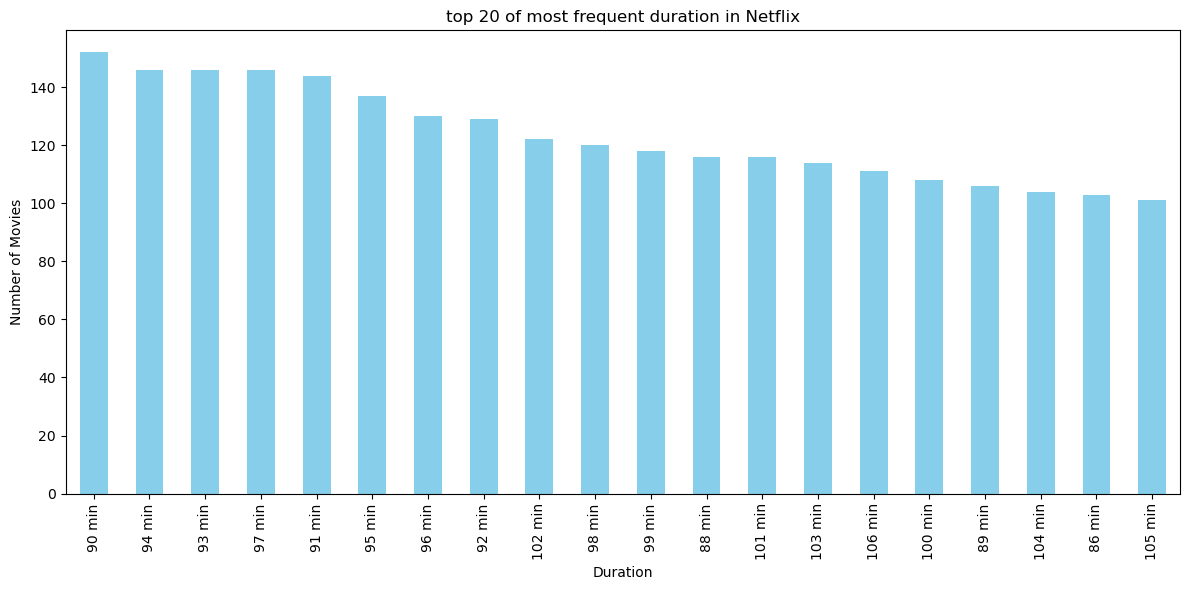

In [15]:
import matplotlib.pyplot as plt
top=movies_duration.head(20)
top.plot(kind='bar', figsize=(12,6),color='skyblue')
plt.title('top 20 of most frequent duration in Netflix')
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# show top 10 country thats produce for Netflix

In [16]:
from collections import Counter

# Drop NaNs and split
all_countries = df['country'].dropna().str.split(',').explode().str.strip()

# Count frequency
country_counts = all_countries.value_counts()
country_counts

country
United States     4042
India             1155
United Kingdom     881
Canada             486
France             425
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: count, Length: 123, dtype: int64

In [17]:
#movie_country= df[df['type'] == 'Movie']['country'].value_counts()
#movie_country

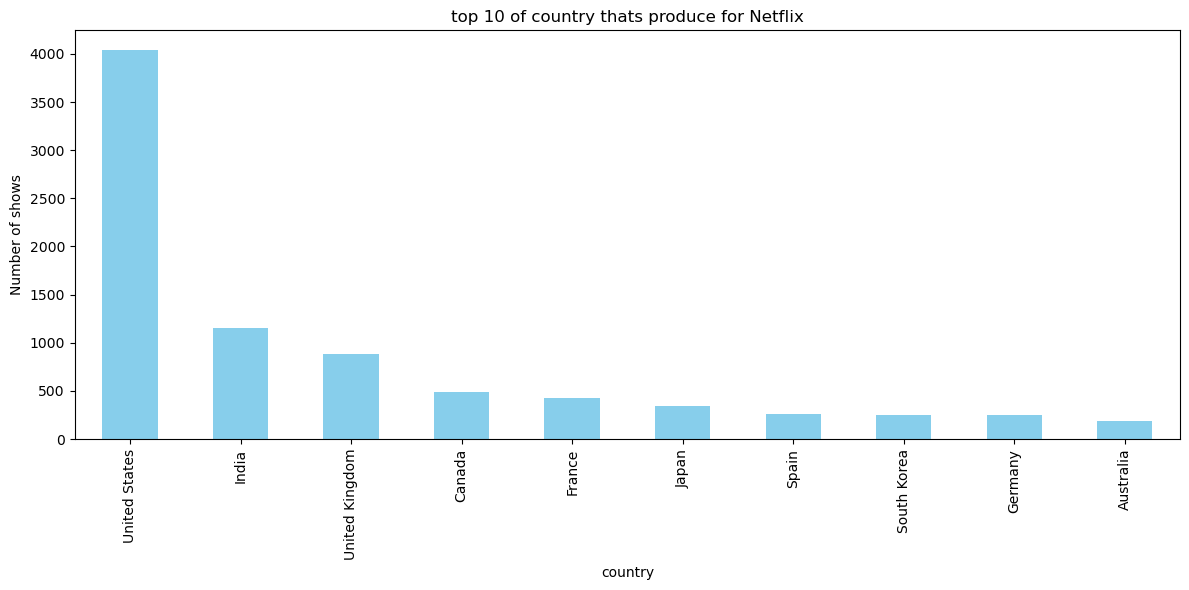

In [18]:
import matplotlib.pyplot as plt
topc=country_counts.head(10)
topc.plot(kind='bar', figsize=(12,6),color='skyblue')
plt.title('top 10 of country thats produce for Netflix')
plt.xlabel('country')
plt.ylabel('Number of shows')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# the number of movies and tv show thats Netflix added in each year

In [19]:
df['date_added'] = pd.to_datetime(df['date_added'])
movies_df = df[df['type'] == 'Movie']
movies_df['year_added'] = movies_df['date_added'].dt.year
movies_per_year = movies_df['year_added'].value_counts().sort_index()
movies_per_year

C:\Users\heba2\AppData\Local\Temp\ipykernel_21396\191833158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['year_added'] = movies_df['date_added'].dt.year


year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     251
2017     836
2018    1237
2019    1424
2020    1284
2021     993
Name: count, dtype: int64

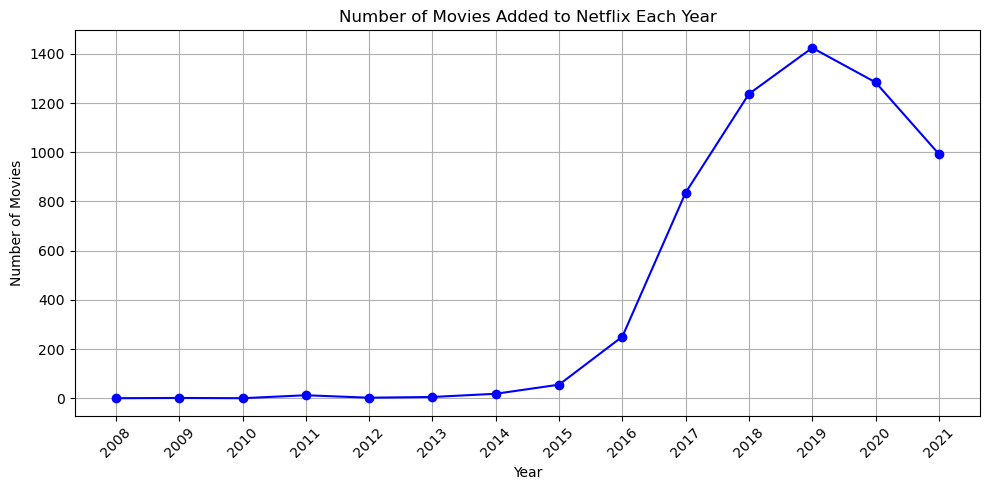

In [20]:

movies_per_year.plot(kind='line', marker='o', figsize=(10,5), color='blue')

plt.title('Number of Movies Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(movies_per_year.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
df['date_added'] = pd.to_datetime(df['date_added'])
tv_df = df[df['type'] == 'TV Show']
tv_df['year_added'] = tv_df['date_added'].dt.year
tv_per_year = tv_df['year_added'].value_counts().sort_index()
tv_per_year

C:\Users\heba2\AppData\Local\Temp\ipykernel_21396\2050072473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['year_added'] = tv_df['date_added'].dt.year


year_added
2008      1
2013      5
2014      5
2015     26
2016    175
2017    349
2018    411
2019    592
2020    595
2021    505
Name: count, dtype: int64

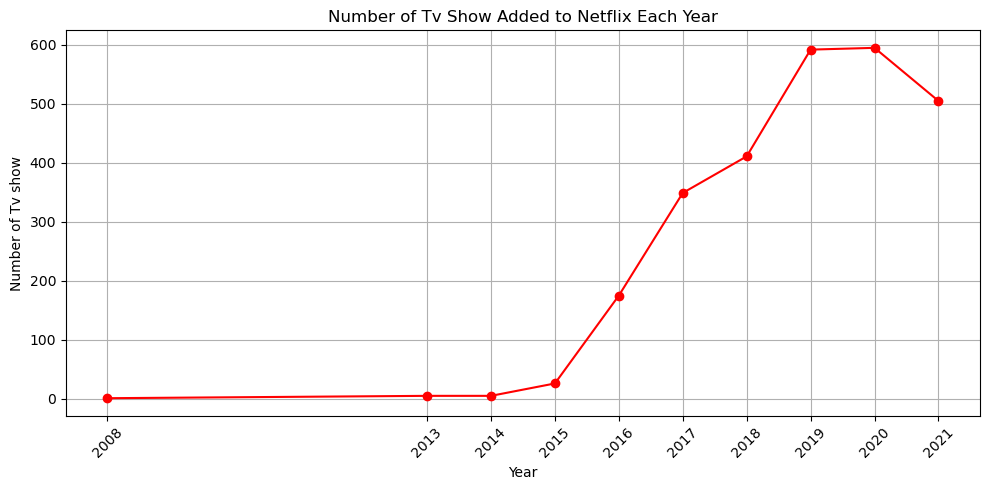

In [22]:
tv_per_year.plot(kind='line', marker='o', figsize=(10,5), color='red')

plt.title('Number of Tv Show Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Tv show')
plt.xticks(tv_per_year.index,rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Percentage of each movie rating on Netflix

In [38]:
movies_rate1=df[df['type'] == 'Movie']['rating'].value_counts()
movie_shape1=df[df['type']== 'Movie']
movie_shape = movie_shape1.shape[0]
movies_rate = round((movies_rate1/movie_shape)*100,2)
movies_rate

rating
TV-MA       33.66
TV-14       23.29
R           13.01
TV-PG        8.81
PG-13        8.00
PG           4.68
TV-Y7        2.27
TV-Y         2.14
TV-G         2.06
NR           1.22
G            0.67
TV-Y7-FV     0.08
NC-17        0.05
UR           0.05
Name: count, dtype: float64

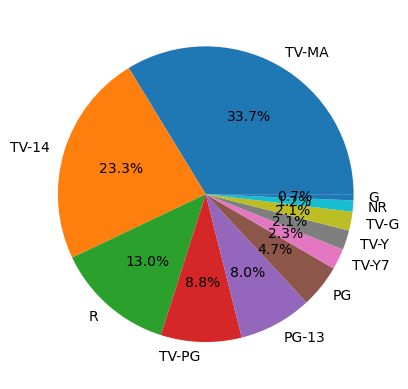

In [49]:
movies_rate2=movies_rate.head(11)
#,'TV-Y7-FV','NC-17','UR'
categories = ['TV-MA','TV-14','R','TV-PG','PG-13','PG','TV-Y7','TV-Y','TV-G','NR','G']       
plt.pie(movies_rate2, labels=categories,autopct='%1.1f%%');

# Percentage of each TV shows rating on Netflix

In [50]:
series_rate1=df[df['type'] == 'TV Show']['rating'].value_counts()
series_shape1=df[df['type']== 'TV Show']
series_shape = series_shape1.shape[0]
series_rate = round((series_rate1/series_shape)*100,2)
series_rate

rating
TV-MA       42.91
TV-14       27.40
TV-PG       12.05
TV-Y7        7.28
TV-Y         6.57
TV-G         3.53
NR           0.15
R            0.08
TV-Y7-FV     0.04
Name: count, dtype: float64

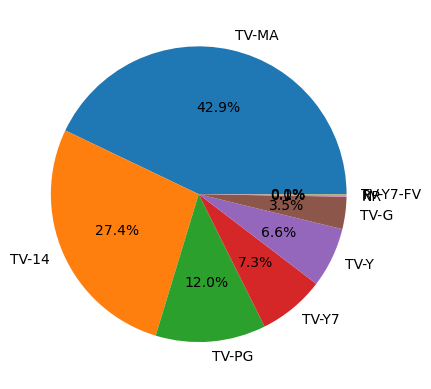

In [52]:
categories = ['TV-MA','TV-14','TV-PG','TV-Y7','TV-Y','TV-G','NR','R','TV-Y7-FV']       
plt.pie(series_rate, labels=categories,autopct='%1.1f%%');

# Top 10 directors who collaborated with Netflix

In [57]:
from collections import Counter

# Drop NaNs and split
all_director = df['director'].dropna().str.split(',').explode().str.strip()

# Count frequency
director_counts = all_director.value_counts()
director_counts

director
Marcus Raboy              32
Jan Suter                 26
Rajiv Chilaka             25
Raúl Campos               24
Jay Karas                 23
                          ..
Kelly Duane de la Vega     1
Johnny Kevorkian           1
Amshan Kumar               1
Adam Davis                 1
Mozez Singh                1
Name: count, Length: 4991, dtype: int64

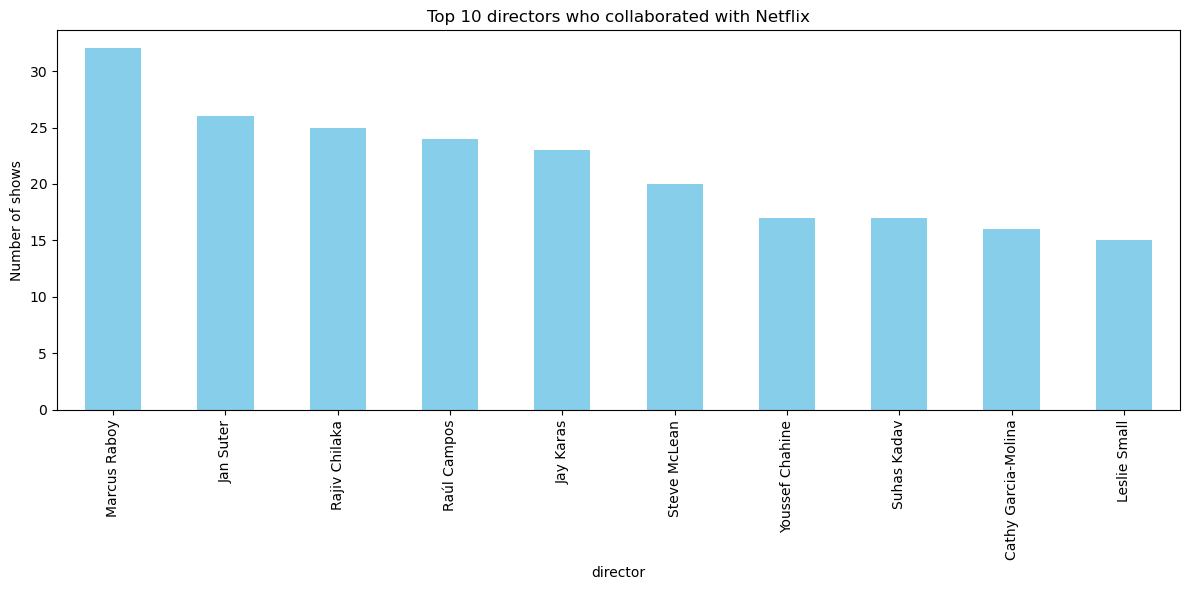

In [58]:
import matplotlib.pyplot as plt
topd=director_counts.head(10)
topd.plot(kind='bar', figsize=(12,6),color='skyblue')
plt.title('Top 10 directors who collaborated with Netflix')
plt.xlabel('director')
plt.ylabel('Number of shows')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()